# 🧠 Análise Exploratória de Dados

Este notebook realiza uma **análise exploratória detalhada** dos três conjuntos de dados disponíveis (`Data1.csv`, `Data2.csv`, `Data3.csv`).

O objetivo é compreender o comportamento das variáveis de entrada (`PwmD`, `PwmE`) e das variáveis de saída (`Wd`, `We`), identificando padrões, correlações e possíveis problemas como outliers ou desbalanceamento.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

sns.set(style="whitegrid", context="notebook")

PREDICTORS = ["PwmD", "PwmE"]
TARGET = ["Wd", "We"]
Datasets = []

for i in range(3):
    Dataset = pd.read_csv(f"../Dados/Data{i + 1}.csv")
    Dataset.index = (np.arange(0, len(Dataset), 1).astype(float) * 0.07).round(5)
    Datasets.append(Dataset)

print(f"Foram carregados {len(Datasets)} datasets.")

Foram carregados 3 datasets.


## 🔍 1. Estrutura dos Dados
Primeiro, verificamos informações gerais sobre o formato de cada dataset, valores ausentes e estatísticas básicas das variáveis.

In [2]:
for i, data in enumerate(Datasets):
    print(f"\n=== Dataset {i+1} ===")
    display(data.info())
    display(data.describe().T)
    print("Valores nulos:")
    print(data.isnull().sum())


=== Dataset 1 ===
<class 'pandas.core.frame.DataFrame'>
Index: 806 entries, 0.0 to 56.35
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       806 non-null    float64
 1   Y       806 non-null    float64
 2   Theta   806 non-null    float64
 3   Wd      806 non-null    float64
 4   We      806 non-null    float64
 5   WdRef   806 non-null    float64
 6   WeRef   806 non-null    float64
 7   PwmD    806 non-null    float64
 8   PwmE    806 non-null    float64
dtypes: float64(9)
memory usage: 63.0 KB


None

,count,mean,std,min,25%,50%,75%,max
X,806.0,0.527382,0.315938,0.00,0.2425,0.540,0.820,0.98
Y,806.0,0.329094,0.287503,0.00,0.0100,0.285,0.690,0.70
Theta,806.0,0.025372,0.477273,-0.92,-0.1625,-0.010,0.420,1.06
Wd,806.0,-0.274578,2.588402,-3.93,-2.8700,-0.045,2.930,4.07
We,806.0,-0.218449,2.577823,-5.24,-2.7300,0.000,2.900,4.93
WdRef,806.0,-0.307903,2.642966,-3.05,-2.8500,-1.100,2.940,2.96
WeRef,806.0,-0.253809,2.640972,-3.06,-2.7100,-2.070,2.940,2.96
PwmD,806.0,-12.944218,82.305985,-111.94,-89.5150,-68.660,87.590,110.94
PwmE,806.0,-12.009057,93.694739,-145.12,-99.5250,-82.940,98.625,135.61


Valores nulos:
X        0
Y        0
Theta    0
Wd       0
We       0
WdRef    0
WeRef    0
PwmD     0
PwmE     0
dtype: int64

=== Dataset 2 ===
<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0.0 to 55.79
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       798 non-null    float64
 1   Y       798 non-null    float64
 2   Theta   798 non-null    float64
 3   Wd      798 non-null    float64
 4   We      798 non-null    float64
 5   WdRef   798 non-null    float64
 6   WeRef   798 non-null    float64
 7   PwmD    798 non-null    float64
 8   PwmE    798 non-null    float64
dtypes: float64(9)
memory usage: 62.3 KB


None

,count,mean,std,min,25%,50%,75%,max
X,798.0,0.534261,0.315706,0.00,0.2500,0.550,0.820,0.97
Y,798.0,0.356855,0.284362,0.00,0.0500,0.325,0.700,0.71
Theta,798.0,0.041629,0.460893,-0.84,-0.1175,-0.000,0.410,1.00
Wd,798.0,-0.276704,2.616371,-3.76,-2.9300,0.000,2.900,3.15
We,798.0,-0.218622,2.642405,-5.41,-2.8400,0.000,2.960,4.63
WdRef,798.0,-0.298509,2.691831,-3.09,-2.9400,-1.530,2.940,3.02
WeRef,798.0,-0.244887,2.700088,-3.09,-2.8700,-1.615,3.010,3.02
PwmD,798.0,-7.377569,82.939736,-105.08,-90.1175,-15.900,87.860,99.11
PwmE,798.0,-11.746967,94.189082,-147.30,-99.5300,-79.170,99.475,132.94


Valores nulos:
X        0
Y        0
Theta    0
Wd       0
We       0
WdRef    0
WeRef    0
PwmD     0
PwmE     0
dtype: int64

=== Dataset 3 ===
<class 'pandas.core.frame.DataFrame'>
Index: 879 entries, 0.0 to 61.46
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       879 non-null    float64
 1   Y       879 non-null    float64
 2   Theta   879 non-null    float64
 3   Wd      879 non-null    float64
 4   We      879 non-null    float64
 5   WdRef   879 non-null    float64
 6   WeRef   879 non-null    float64
 7   PwmD    879 non-null    float64
 8   PwmE    879 non-null    float64
dtypes: float64(9)
memory usage: 68.7 KB


None

,count,mean,std,min,25%,50%,75%,max
X,879.0,0.561149,0.310194,0.00,0.290,0.61,0.850,0.98
Y,879.0,0.371263,0.280617,0.00,0.040,0.37,0.700,0.71
Theta,879.0,0.108987,0.496546,-0.83,-0.075,0.00,0.460,1.24
Wd,879.0,-0.267190,2.481949,-4.43,-2.840,0.00,2.855,3.24
We,879.0,-0.214812,2.511902,-5.38,-2.680,0.00,2.960,5.33
WdRef,879.0,-0.295631,2.549281,-3.09,-2.850,-1.05,2.915,3.02
WeRef,879.0,-0.251468,2.547011,-3.09,-2.710,-1.33,3.000,3.02
PwmD,879.0,-15.658350,80.521230,-116.70,-89.250,-59.47,88.095,99.51
PwmE,879.0,-18.922742,92.637515,-147.52,-99.370,-79.51,99.775,147.27


Valores nulos:
X        0
Y        0
Theta    0
Wd       0
We       0
WdRef    0
WeRef    0
PwmD     0
PwmE     0
dtype: int64


🧩 **Interpretação:**
- A função `info()` revela o número de linhas, tipos de dados e existência de valores nulos.
- O `describe()` mostra estatísticas como média, desvio padrão, mínimo e máximo.
- É importante confirmar que todas as colunas são numéricas e que não há valores ausentes.

## 📊 2. Distribuição das Variáveis
Aqui verificamos a forma das distribuições das variáveis preditoras e alvo. Distribuições simétricas indicam comportamento estável; distribuições assimétricas podem revelar saturação ou zonas mortas no sistema.

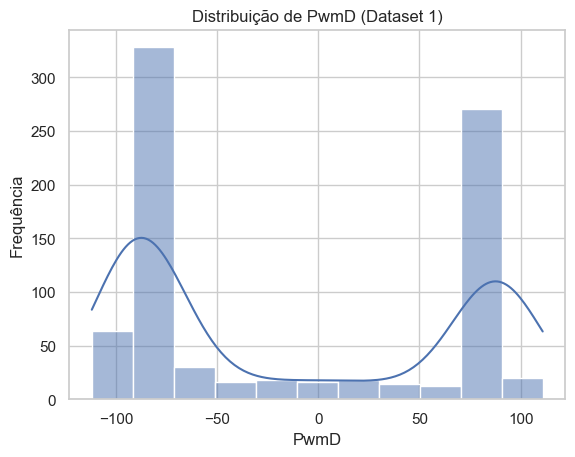

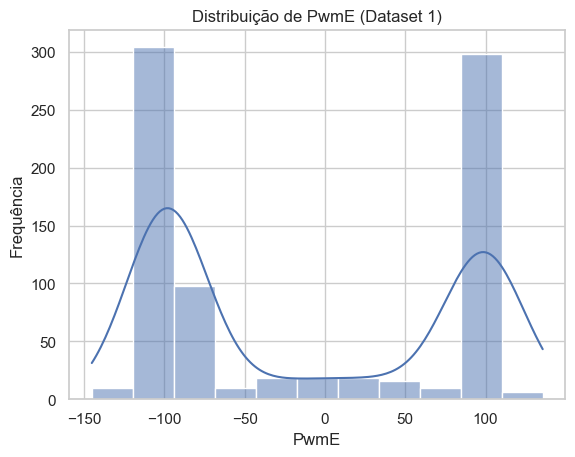

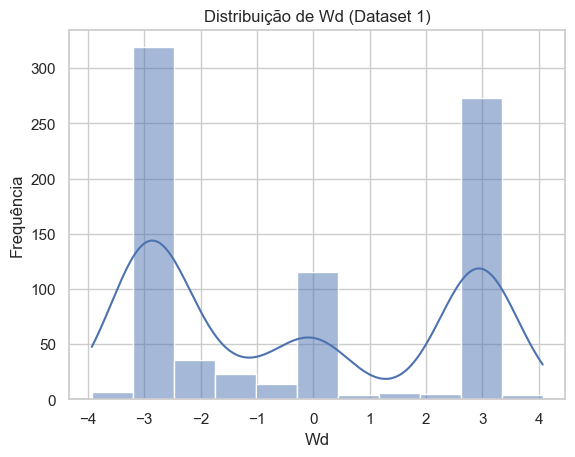

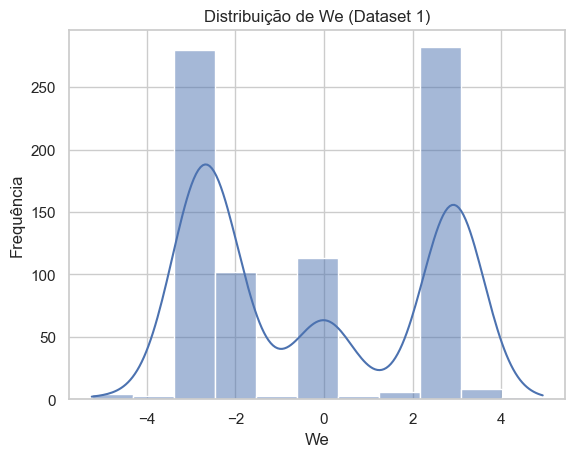

In [3]:
for col in PREDICTORS + TARGET:
    sns.histplot(Datasets[0][col], kde=True)
    plt.title(f"Distribuição de {col} (Dataset 1)")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.show()

📈 **Interpretação:**
- O formato das curvas indica se os dados são normalmente distribuídos ou não.
- Valores muito concentrados em uma faixa indicam possível limitação do sensor ou saturação de controle.
- A presença de várias modas (picos) pode indicar regimes operacionais distintos.

## 🎯 3. Boxplots — Detecção de Outliers
Os boxplots ajudam a visualizar valores fora da faixa esperada (outliers), que podem distorcer médias e correlações.

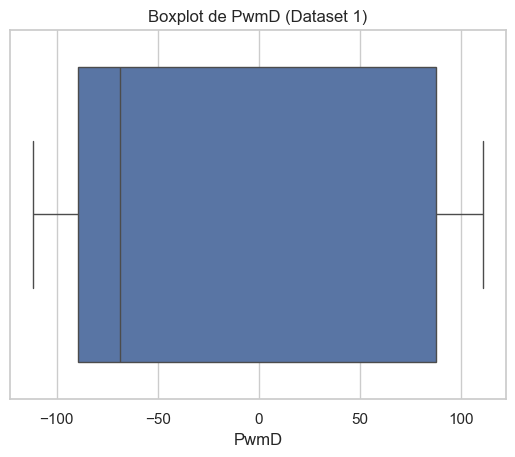

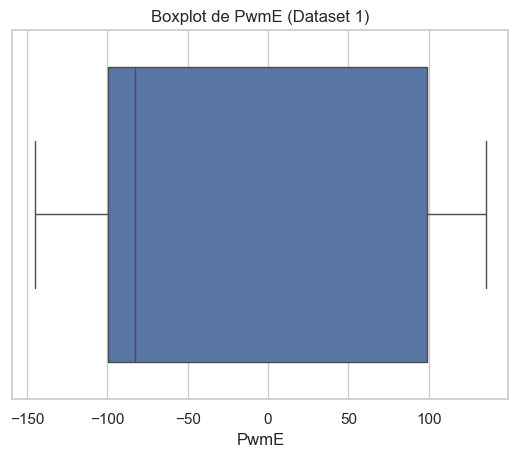

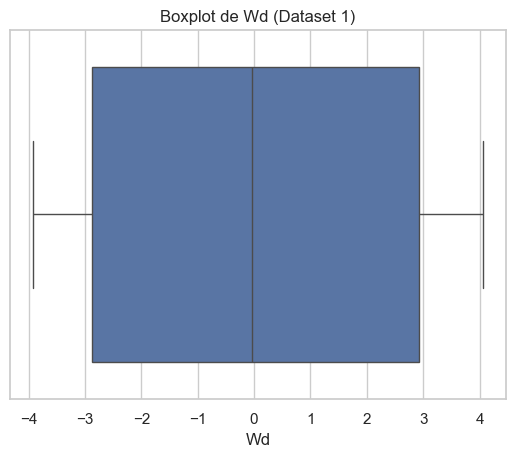

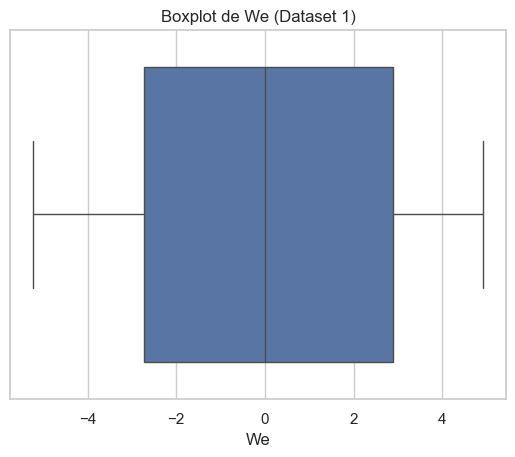

In [4]:
for col in PREDICTORS + TARGET:
    sns.boxplot(x=Datasets[0][col])
    plt.title(f"Boxplot de {col} (Dataset 1)")
    plt.show()

📊 **Interpretação:**
- Pontos fora do intervalo interquartil (caixas) indicam **outliers potenciais**.
- Se forem recorrentes, podem ser dados reais de operação extrema; se raros, podem ser ruído ou erro de medição.

## 🔗 4. Relações entre Variáveis (Pairplot)
O gráfico de dispersão mostra correlações e relações não lineares entre as variáveis de entrada e saída.

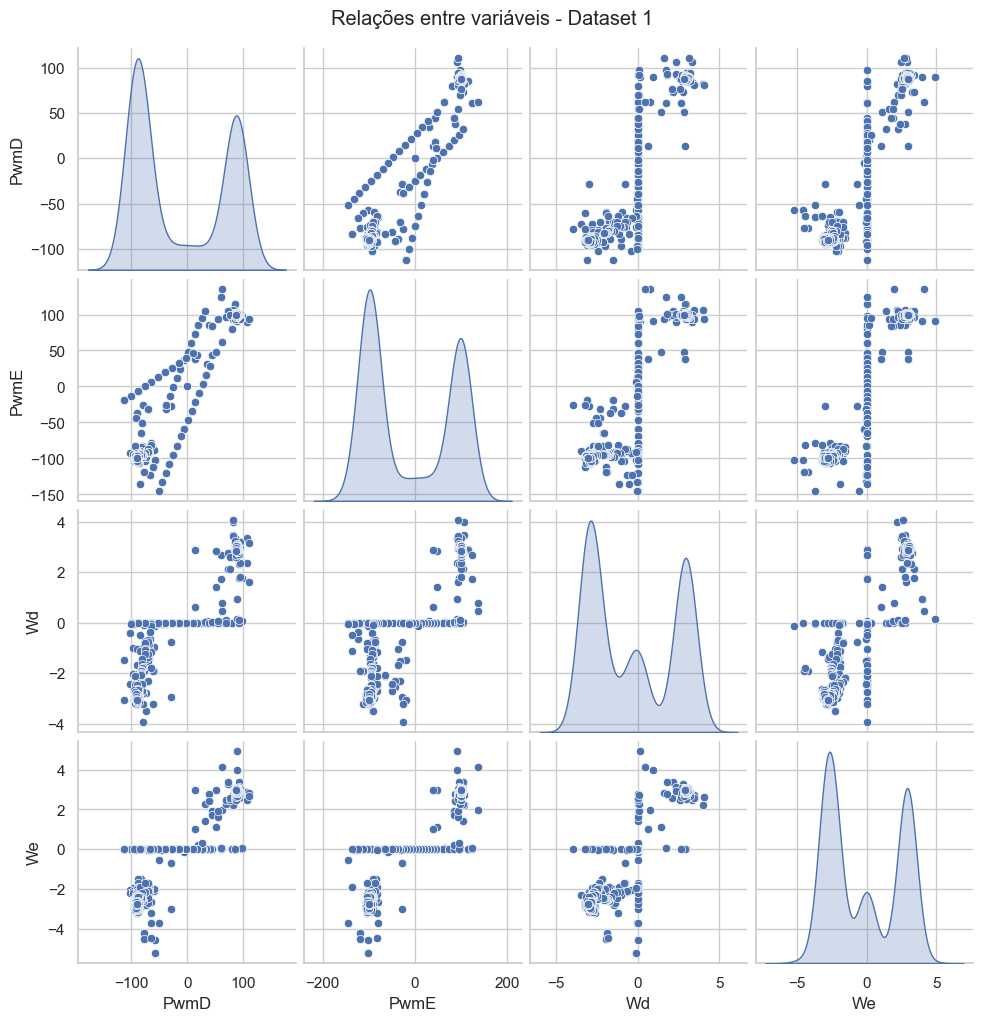

In [5]:
sns.pairplot(Datasets[0][PREDICTORS + TARGET], diag_kind='kde')
plt.suptitle("Relações entre variáveis - Dataset 1", y=1.02)
plt.show()

🧠 **Interpretação:**
- Relações lineares aparecem como nuvens inclinadas.
- Relações não lineares podem ser curvas ou padrões em forma de arco.
- A diagonal mostra a densidade individual de cada variável.

## 🧮 5. Matriz de Correlação
A matriz de correlação ajuda a identificar variáveis fortemente relacionadas entre si.

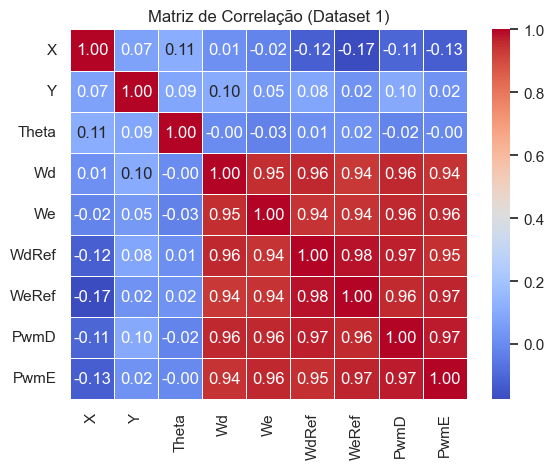

In [6]:
corr = Datasets[0].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Matriz de Correlação (Dataset 1)")
plt.show()

📉 **Interpretação:**
- Valores próximos de 1 ou -1 indicam forte correlação.
- Correlações altas entre `PwmD` e `Wd` (ou `PwmE` e `We`) podem indicar uma relação direta de controle.
- Correlações cruzadas (ex.: `PwmD` e `We`) podem revelar acoplamento entre os sistemas.

## ⏱️ 6. Séries Temporais
Visualização das variáveis ao longo do tempo para identificar tendências, oscilações e ruídos.

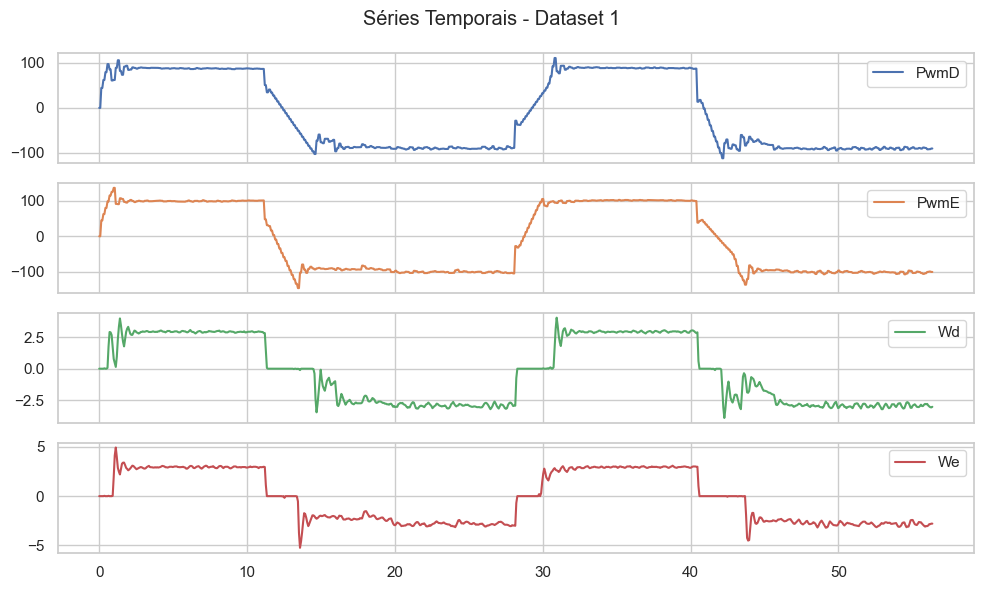

In [7]:
Datasets[0][PREDICTORS + TARGET].plot(subplots=True, figsize=(10,6), title="Séries Temporais - Dataset 1")
plt.tight_layout()
plt.show()

🕒 **Interpretação:**
- Mudanças bruscas indicam transientes.
- Trechos constantes sugerem operação estacionária.
- Padrões periódicos podem indicar um comportamento controlado ou repetitivo.

## ⚙️ 7. Análise de Componentes Principais (PCA)
Usada para identificar redundância entre as variáveis de entrada e avaliar a dimensionalidade dos dados.

Variância explicada: [0.98690622 0.01309378]


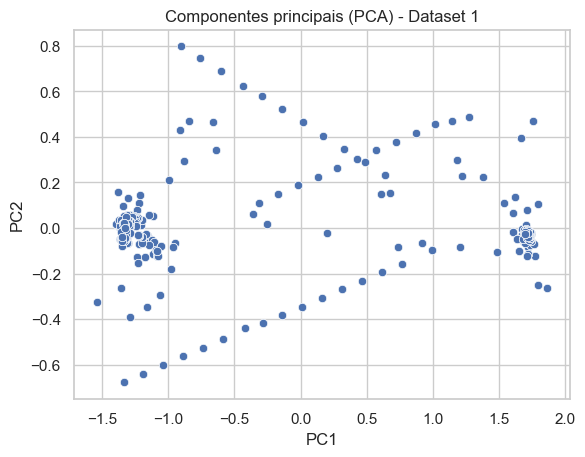

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Datasets[0][PREDICTORS])
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
print("Variância explicada:", pca.explained_variance_ratio_)

sns.scatterplot(x=components[:,0], y=components[:,1])
plt.title("Componentes principais (PCA) - Dataset 1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

📊 **Interpretação:**
- Se uma componente explica grande parte da variância, as variáveis são fortemente correlacionadas.
- Distribuição dispersa indica que ambas as variáveis trazem informação independente.

## 📈 8. Comparação entre Datasets
Verificamos se a média das variáveis alvo muda significativamente entre os três datasets, o que pode indicar mudança de condições experimentais.

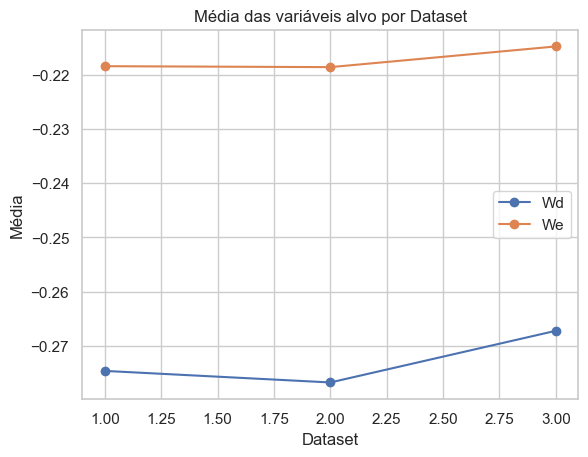

ANOVA para Wd: F=0.003, p=0.997


In [9]:
means = [data[TARGET].mean() for data in Datasets]
plt.plot(range(1,4), [m['Wd'] for m in means], 'o-', label='Wd')
plt.plot(range(1,4), [m['We'] for m in means], 'o-', label='We')
plt.legend()
plt.title("Média das variáveis alvo por Dataset")
plt.xlabel("Dataset")
plt.ylabel("Média")
plt.show()

# Teste ANOVA para diferenças significativas
f, p = f_oneway(Datasets[0]['Wd'], Datasets[1]['Wd'], Datasets[2]['Wd'])
print(f"ANOVA para Wd: F={f:.3f}, p={p:.3f}")

📊 **Interpretação:**
- Se as médias diferirem significativamente (p < 0.05), há indícios de mudança no comportamento entre datasets.
- Isso pode indicar variação experimental, ajuste de controle ou condições externas diferentes.

---
## ✅ Conclusão
Esta análise fornece uma visão detalhada sobre o comportamento e qualidade dos dados:
- **Distribuições** ajudam a identificar saturação ou ruído;
- **Boxplots** e **heatmaps** revelam outliers e relações fortes;
- **PCA** mostra redundância nas variáveis;
- **Análises comparativas** indicam estabilidade entre diferentes datasets.

Essas informações são fundamentais antes de qualquer modelagem ou ajuste de sistema.